In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [7]:
iris_data.head(2)
iris_data.drop('Id', axis=1, inplace=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X = iris_data.drop('Species', axis=1)
Y = iris_data['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=67)

In [18]:
# find best K value which has low error rate (elbow method)
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

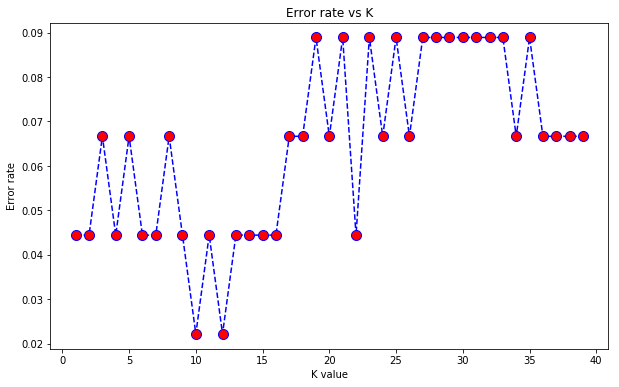

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K value')
plt.ylabel('Error rate')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:

# based on the above chart, if we go with K=10, predictions and accuracy would be high
knn1 = KNeighborsClassifier(10)
knn1.fit(x_train, y_train)
pred = knn1.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[12  0  0]
 [ 0 19  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.93      1.00      0.96        13

    avg / total       0.98      0.98      0.98        45

